# Kruhová deska

## Základní vztahy

<img src="element_deska.PNG" alt="element desky" title="element desky" width="450"/>

\begin{equation}
  \begin{split}
    \vartheta &= C_{1}r+\frac{C_{2}}{r}+\vartheta_{p}, \\
    \vartheta_{p} &= -\frac{1}{rB}\int\left[r\int\mathcal{T}\mathrm{d}r\right]\mathrm{d}r, \\
    \mathcal{M}_{r} &= -B\left(\frac{\partial\vartheta}{\partial r}+\nu\frac{\vartheta}{r}\right), \\
    \mathcal{M}_{t}	&= -B\left(\frac{\vartheta}{r}+\nu\frac{\partial\vartheta}{\partial r}\right), \\
    w &= \int\vartheta\mathrm{d}r+C_{3}, \\
    \sigma_{r,\mathrm{ex}} &= \pm\frac{6\mathcal{M}_{r}}{h^{2}}, \\
    \sigma_{t,\mathrm{ex}} &= \pm\frac{6\mathcal{M}_{t}}{h^{2}},
  \end{split}
\end{equation}

kde $h$ je tloušťka desky a 

\begin{equation}
  B=\frac{Eh^{3}}{12\left(1-\nu^{2}\right)}
\end{equation}

je tuhost desky.

## Př.:

U desky podle obrázku určete vztahy pro průhyb $w$, natočení $\vartheta$, momenty $\mathcal{M}_{r}$, $\mathcal{M}_{t}$ a sílu $\mathcal{T}$. Na obrázku je zatížená kruhová deska a uvolnění jejích elementů pro vyjádření posouvajících sil $\mathcal{T_{I}}$ a $\mathcal{T_{II}}$.

<img src="deska_obr.png" alt="zadání" title="zadání" width="500"/>

## Řešení:

Načtení potřebných knihoven a nastavení kvalitního výpisu

In [1]:
import sympy as sp
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
sp.init_printing(use_unicode=False)

Zavedení symbolů proměnných

In [2]:
T1,T2=sp.symbols('T1 T2')
p,F=sp.symbols('p F')
r,r1,r2,r3=sp.symbols('r r1 r2 r3')
B,mu=sp.symbols('B mu')
C1,C2,C3,C4,C5,C6=sp.symbols('C1 C2 C3 C4 C5 C6')

Deska se musí, vzhledem k přítomnosti vazby a změny zatížení rozdělit na vnější část $I$ a vnitřní část $II$, kde $r_{I}\in[r_{2},r_{3}]$ a $r_{II}\in[r_{1,}r_{2}]$. Na základě uvolnění elementárních částí desky pro silovou rovnováhu v axiálním směru pro úseky $I$ a $II$ platí

\begin{equation}
  \begin{split}
    2\pi r_{I}\mathcal{T}_{I} &= \pi p\left(r_{3}^{2}-r_{I}^{2}\right), \\
	2\pi r_{II}\mathcal{T}_{II} &= 2\pi r_{1}\mathcal{F}.
  \end{split}
\end{equation}

In [3]:
eqnI=2*sp.pi*r*T1-sp.pi*p*(r3**2-r**2)
eqnII=2*sp.pi*r*T2+2*sp.pi*r1*F
eqnI,eqnII

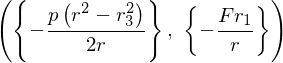

In [4]:
solT1=sp.solveset(eqnI,T1)
solT2=sp.solveset(eqnII,T2)
solT1,solT2

Odtud lze vyjádřit partikulární řešení

\begin{equation}
  \begin{split}
    \vartheta_{pI} &= -\frac{1}{Br_{I}}\int r_{I}\left(\int\mathcal{T}_{I}\mathrm{d}r_{I}\right)\mathrm{d}r_{I}, \\
    \vartheta_{pII}	&= -\frac{1}{Br_{II}}\int r_{II}\left(\int\mathcal{T}_{II}\mathrm{d}r_{II}\right)\mathrm{d}r_{II}.
  \end{split}
\end{equation}

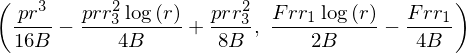

In [5]:
tp1=sp.expand(-1/B/r*sp.integrate(r*sp.integrate(solT1.args[0],r),r))
tp2=sp.expand(-1/B/r*sp.integrate(r*sp.integrate(solT2.args[0],r),r))
tp1,tp2

Řešení hledá ve tvaru

\begin{equation}
  \begin{split}
    \vartheta_{I} &= C_{1}r_{I}+\frac{C_{2}}{r_{I}}+\vartheta_{pI}, \\
    w_{I} &= \int\vartheta_{I}\mathrm{d}r_{I}+C_{3}, \\
    \vartheta_{II} &= C_{4}r_{II}+\frac{C_{5}}{r_{II}}+\vartheta_{pII}, \\
    w_{II} &= \int\vartheta_{II}\mathrm{d}r_{II}+C_{6}.
  \end{split}
\end{equation}

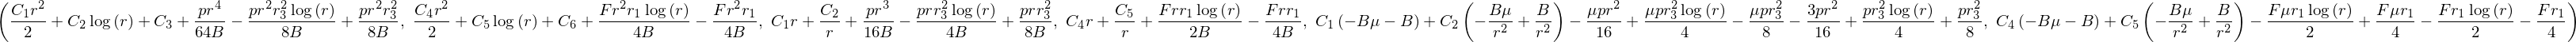

In [6]:
t1=sp.collect(sp.expand(C1*r+C2/r+tp1),(C1,C2))
t2=sp.collect(sp.expand(C4*r+C5/r+tp2),(C4,C5))
w1=sp.collect(sp.expand(sp.integrate(t1,r)+C3),(C1,C2,C3))
w2=sp.collect(sp.expand(sp.integrate(t2,r)+C6),(C4,C5,C6))
Mr1=sp.collect(sp.expand(-B*(t1.diff(r)+mu*t1/r)),(C1,C2,C3))
Mr2=sp.collect(sp.expand(-B*(t2.diff(r)+mu*t2/r)),(C4,C5,C6))
Mt1=sp.collect(sp.expand(-B*(mu*t1.diff(r)+t1/r)),(C1,C2,C3))
Mt2=sp.collect(sp.expand(-B*(mu*t2.diff(r)+t2/r)),(C4,C5,C6))
w1,w2,t1,t2,Mr1,Mr2

Konstanty $C_{1}$–$C_{6}$ se určí z okrajových podmínek

\begin{equation}
  \begin{split}
    \mathcal{M}_{rII} &= 0 \quad\mathrm{pro}\:r=r_{1}, \\		
    w_{I} &=0 \quad\mathrm{pro}\:r=r_{2}, \\		
    w_{II} &=0 \quad\mathrm{pro}\:r=r_{2}, \\		
    \vartheta_{I} &= \vartheta_{II}\quad\mathrm{pro}\:r=r_{2}, \\		
    \mathcal{M}_{rI} &= \mathcal{M}_{rII}\quad\mathrm{pro}\:r=r_{2}, \\		
    \mathcal{M}_{rI} &= 0\quad\mathrm{pro}\:r=r_{3}.
  \end{split}
\end{equation}

Není smysluplné je vypisovat, jelikož mají složitý tvar.

In [7]:
benq1=w1.subs(r,r2)
benq2=w2.subs(r,r2)
benq3=t1.subs(r,r2)-t2.subs(r,r2)
benq4=Mr1.subs(r,r2)-Mr2.subs(r,r2)
benq5=Mr1.subs(r,r3)
benq6=Mr2.subs(r,r1)
solb=sp.linsolve([benq1,benq2,benq3,benq4,benq5,benq6],[C1,C2,C3,C4,C5,C6])

Praktičtější je dosazení konkrétních hodnot, opět nebudeme vypisovat všechny veličiny, pouze hodnoty konstant $C_1$-$C_6$.

In [8]:
r1_,r2_,r3_=100,200,300
h_=5
E_,mu_=2.1e5,0.3
F_,p_=1.0e4/(2.*np.pi*r1_),0.1
B_=E_*h_**3/12./(1.-mu_)
C1_=float(solb.args[0][0].subs({r1:r1_,r2:r2_,r3:r3_,B:B_,mu:mu_,F:F_,p:p_}))
C2_=float(solb.args[0][1].subs({r1:r1_,r2:r2_,r3:r3_,B:B_,mu:mu_,F:F_,p:p_}))
C3_=float(solb.args[0][2].subs({r1:r1_,r2:r2_,r3:r3_,B:B_,mu:mu_,F:F_,p:p_}))
C4_=float(solb.args[0][3].subs({r1:r1_,r2:r2_,r3:r3_,B:B_,mu:mu_,F:F_,p:p_}))
C5_=float(solb.args[0][4].subs({r1:r1_,r2:r2_,r3:r3_,B:B_,mu:mu_,F:F_,p:p_}))
C6_=float(solb.args[0][5].subs({r1:r1_,r2:r2_,r3:r3_,B:B_,mu:mu_,F:F_,p:p_}))
w1_=w1.subs({r1:r1_,r2:r2_,r3:r3_,B:B_,mu:mu_,F:F_,p:p_,C1:C1_,C2:C2_,C3:C3_})
w2_=w2.subs({r1:r1_,r2:r2_,r3:r3_,B:B_,mu:mu_,F:F_,p:p_,C4:C4_,C5:C5_,C6:C6_})
Mr1_=Mr1.subs({r1:r1_,r2:r2_,r3:r3_,B:B_,mu:mu_,F:F_,p:p_,C1:C1_,C2:C2_,C3:C3_})
Mr2_=Mr2.subs({r1:r1_,r2:r2_,r3:r3_,B:B_,mu:mu_,F:F_,p:p_,C4:C4_,C5:C5_,C6:C6_})
Mt1_=Mt1.subs({r1:r1_,r2:r2_,r3:r3_,B:B_,mu:mu_,F:F_,p:p_,C1:C1_,C2:C2_,C3:C3_})
Mt2_=Mt2.subs({r1:r1_,r2:r2_,r3:r3_,B:B_,mu:mu_,F:F_,p:p_,C4:C4_,C5:C5_,C6:C6_})
T1_=solT1.args[0].subs({r3:r3_,p:p_})
T2_=solT2.args[0].subs({r1:r1_,F:F_})
print("C1={}\nC2={}\nC3={}\nC4={}\nC5={}\nC6={}".format(C1_,C2_,C3_,C4_,C5_,C6_))

C1=0.003744095882967474
C2=-16.639167654062664
C3=74.3734433653668
C4=-0.0012598980592763182
C5=-0.346209475122032
C6=5.141138272385314


Zbývá vykreslit grafy. Nejdříve se musí vygenerovat síť ve tvaru mezikruhové desky a v každém nódu vyjádřit hodnoty průhybu $w$, momentů $\mathcal{M_r}$, $\mathcal{M_t}$ a posouvající síly $\mathcal{T}$.

In [9]:
#uzly triangulovane desky
n_angles=36
n_radii=8
# An array of radii
# Does not include radius r=0, this is to eliminate duplicate points
radii1=np.linspace(r2_,r3_,n_radii)
radii2=np.linspace(r1_,r2_,n_radii)
# An array of angles
angles=np.linspace(0,2*np.pi,n_angles,endpoint=False)
xp1=np.array([ii*np.cos(jj) for jj in angles for ii in radii1])
yp1=np.array([ii*np.sin(jj) for jj in angles for ii in radii1])
xp2=np.array([ii*np.cos(jj) for jj in angles for ii in radii2])
yp2=np.array([ii*np.sin(jj) for jj in angles for ii in radii2])
# Create the Triangulation; no triangles so Delaunay triangulation created.
triang1=tri.Triangulation(xp1,yp1)
triang2=tri.Triangulation(xp2,yp2)
# Mask off unwanted triangles.
xmid=xp1[triang1.triangles].mean(axis=1)
ymid=yp1[triang1.triangles].mean(axis=1)
mask=np.where(xmid*xmid+ymid*ymid<r2_**2, 1, 0)
triang1.set_mask(mask)
xmid=xp2[triang2.triangles].mean(axis=1)
ymid=yp2[triang2.triangles].mean(axis=1)
mask=np.where(xmid*xmid+ymid*ymid<r1_**2, 1, 0)
triang2.set_mask(mask)
#vycisleni hodnot v uzlech triangulovanych oblasti
zw1,zw2=[],[]
zMr1,zMr2=[],[]
zMt1,zMt2=[],[]
zT1,zT2=[],[]
for ii in range(len(xp1)):
  rp1=np.sqrt(xp1[ii]**2+yp1[ii]**2)
  rp2=np.sqrt(xp2[ii]**2+yp2[ii]**2)
  zw1_=float(-w1_.subs(r,rp1))
  zw2_=float(-w2_.subs(r,rp2))
  zMr1_=float(Mr1_.subs(r,rp1))
  zMr2_=float(Mr2_.subs(r,rp2))
  zMt1_=float(Mt1_.subs(r,rp1))
  zMt2_=float(Mt2_.subs(r,rp2))
  zT1_=float(T1_.subs(r,rp1))
  zT2_=float(T2_.subs(r,rp2))  
  zw1.append(zw1_)
  zw2.append(zw2_)
  zMr1.append(zMr1_)
  zMr2.append(zMr2_)
  zMt1.append(zMt1_)
  zMt2.append(zMt2_)
  zT1.append(zT1_)
  zT2.append(zT2_)

Pro ilustraci nejdříve vykrelsení trangulované mezikruhové oblasti reprezentující desku.

*Poznámka*: Uvedená triangulace nemá žádnou souvislost s metodou konečných prvků nebo jinou numerickou metodou, jde pouze o nástroj ke grafickému znázornění průhybu $w$, momentů $\mathcal{M}_r$, $\mathcal{M}_t$ a síly $\mathcal{T}$.

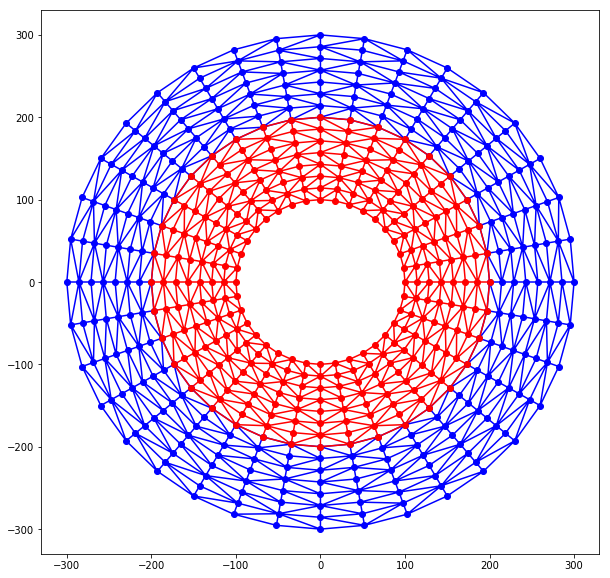

In [10]:
fig = plt.figure(figsize=(10,10))
plt.triplot(triang1, 'bo-')
plt.triplot(triang2, 'ro-')
plt.show()

Vykreslení průhybu desky $w$.

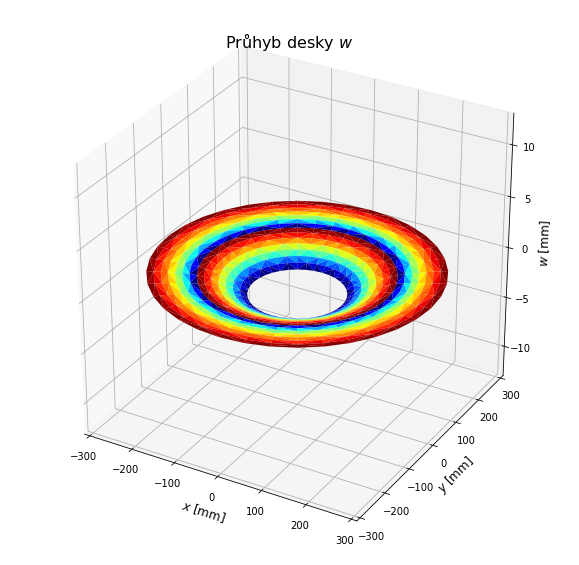

In [11]:
#Vykresleni 
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.set_title('Průhyb desky '+r'$w$').set_fontsize(16)
ax.set_xlim(-r3_,r3_)
ax.set_ylim(-r3_,r3_)
ax.set_zlim(-r1_/8.,r1_/8.)
ax.set_xlabel('$x$ '+r'$\mathrm{[mm]}$').set_fontsize(12)
ax.set_ylabel('$y$ '+r'$\mathrm{[mm]}$').set_fontsize(12)
ax.set_zlabel(r'$w$ '+r'$\mathrm{[mm]}$').set_fontsize(12)
ax.plot_trisurf(xp1,yp1,triang1.get_masked_triangles(),zw1,cmap=cm.jet,linewidth=0.2)
ax.plot_trisurf(xp2,yp2,triang2.get_masked_triangles(),zw2,cmap=cm.jet,linewidth=0.2)
plt.show()

Vykreslení momentů $\mathcal{M_r}$ a $\mathcal{M_t}$.

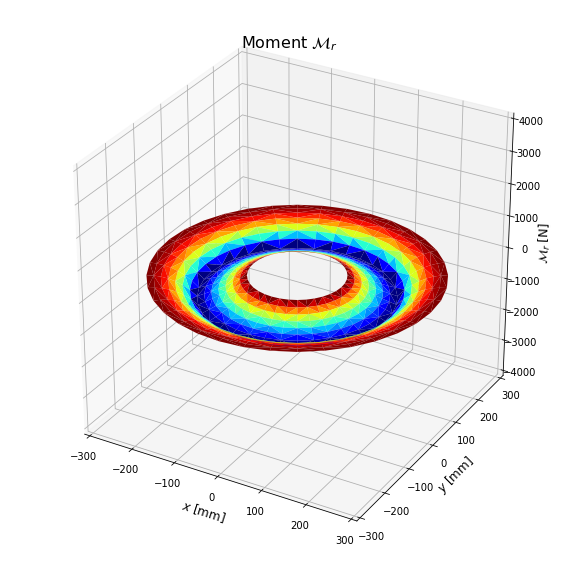

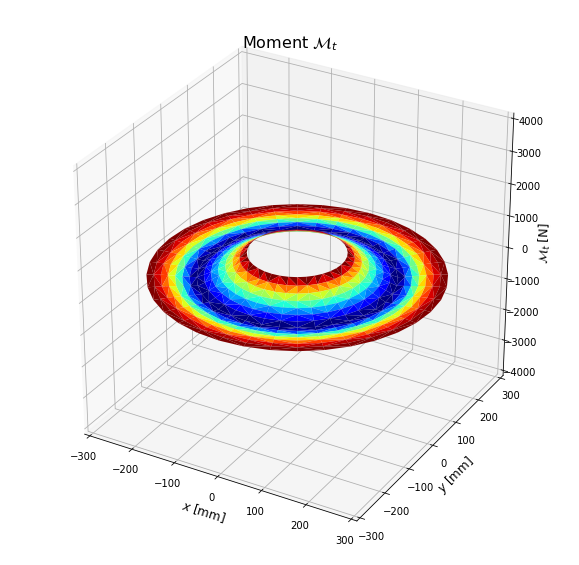

In [12]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.set_title('Moment '+r'$\mathcal{M}_r$').set_fontsize(16)
ax.set_xlim(-r3_,r3_)
ax.set_ylim(-r3_,r3_)
ax.set_zlim(-4000,4000)
ax.set_xlabel('$x$ '+r'$\mathrm{[mm]}$').set_fontsize(12)
ax.set_ylabel('$y$ '+r'$\mathrm{[mm]}$').set_fontsize(12)
ax.set_zlabel(r'$\mathcal{M}_r$ '+r'$\mathrm{[N]}$').set_fontsize(12)
ax.plot_trisurf(xp1,yp1,triang1.get_masked_triangles(),zMr1,cmap=cm.jet,linewidth=0.2)
ax.plot_trisurf(xp2,yp2,triang2.get_masked_triangles(),zMr2,cmap=cm.jet,linewidth=0.2)
plt.show()
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.set_title('Moment '+r'$\mathcal{M}_t$').set_fontsize(16)
ax.set_xlim(-r3_,r3_)
ax.set_ylim(-r3_,r3_)
ax.set_zlim(-4000,4000)
ax.set_xlabel('$x$ '+r'$\mathrm{[mm]}$').set_fontsize(12)
ax.set_ylabel('$y$ '+r'$\mathrm{[mm]}$').set_fontsize(12)
ax.set_zlabel(r'$\mathcal{M}_t$ '+r'$\mathrm{[N]}$').set_fontsize(12)
ax.plot_trisurf(xp1,yp1,triang1.get_masked_triangles(),zMt1,cmap=cm.jet,linewidth=0.2)
ax.plot_trisurf(xp2,yp2,triang2.get_masked_triangles(),zMt2,cmap=cm.jet,linewidth=0.2)
plt.show()

Vykreslení posouvající síly $\mathcal{T}$, která je v místě podpory nespojitá.

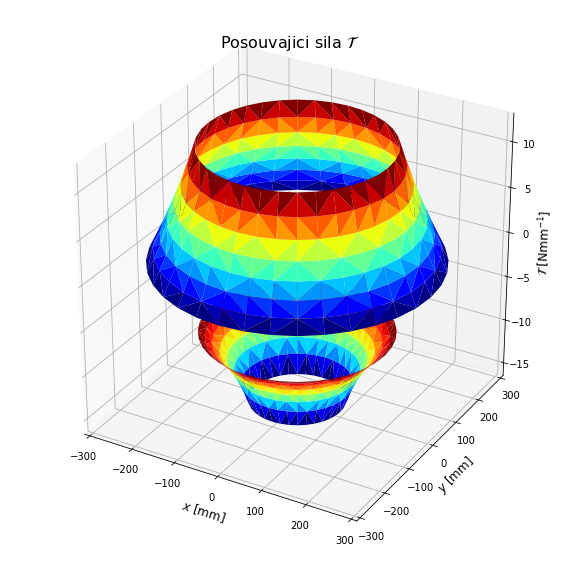

In [13]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.set_title('Posouvajici sila '+r'$\mathcal{T}$').set_fontsize(16)
ax.set_xlim(-r3_,r3_)
ax.set_ylim(-r3_,r3_)
#ax.set_zlim(-4000,4000)
ax.set_xlabel('$x$ '+r'$\mathrm{[mm]}$').set_fontsize(12)
ax.set_ylabel('$y$ '+r'$\mathrm{[mm]}$').set_fontsize(12)
ax.set_zlabel(r'$\mathcal{T}$ '+r'$\mathrm{[Nmm}^{-1}]$').set_fontsize(12)
ax.plot_trisurf(xp1,yp1,triang1.get_masked_triangles(),zT1,cmap=cm.jet,linewidth=0.2)
ax.plot_trisurf(xp2,yp2,triang2.get_masked_triangles(),zT2,cmap=cm.jet,linewidth=0.2)
plt.show()